时间序列去趋势化和傅里叶变换

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
 
# N = 10
# ns = np.arange(N)
 
# fig, axes = plt.subplots(1, N//2+1, figsize=(18,8), sharex=True, sharey=True)
 
# for k in range(0, N//2+1):
#      eiks = np.exp(-2*1J*np.pi*ns/N*k)
#      pretty_ax(axes[k])
#      plot_sum_vector(eiks, axes[k])
#      axes[k].set_title(f'k={k}')
#      axes[k].set_aspect('equal')
# fig.suptitle(f'Complex plot of the $e^{{-2i\pi kn/N}}$ families')

去趋势

Text(0.5, 1.0, 'Module of Fourier-transform')

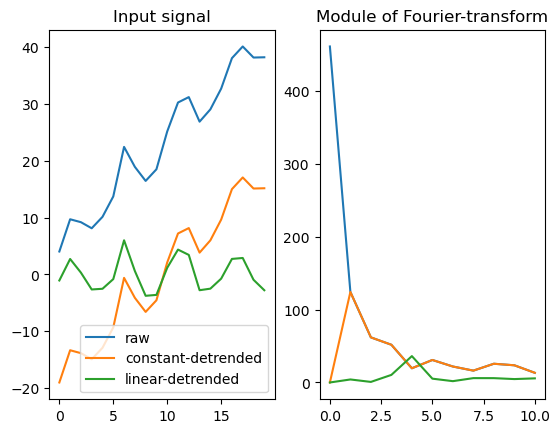

In [3]:
import numpy as np
from scipy.signal import detrend
import matplotlib.pyplot as plt
 
N = 20
 # create a sample signal, with linear, offset, noise and sinus parts
ys = np.arange(N) * 2 + 4 + np.random.randn(N) + 4*np.sin(2*np.pi*np.arange(N)/5)
 # constant and linear detrend
ys_c = detrend(ys, type='constant')
ys_l = detrend(ys, type='linear')
 
fig, axes = plt.subplots(1, 2)
 
ax = axes[0]
ax.plot(ys, label='raw')
ax.plot(ys_c, label='constant-detrended')
ax.plot(ys_l, label='linear-detrended')
ax.legend()
ax.set_title('Input signal')
 
ax = axes[1]
 # we use rfft since our input signals are real
ax.plot(np.abs(np.fft.rfft(ys)))
ax.plot(np.abs(np.fft.rfft(ys_c)))
ax.plot(np.abs(np.fft.rfft(ys_l)))
ax.set_title('Module of Fourier-transform')

傅里叶去噪
![alt text](image-2.png)

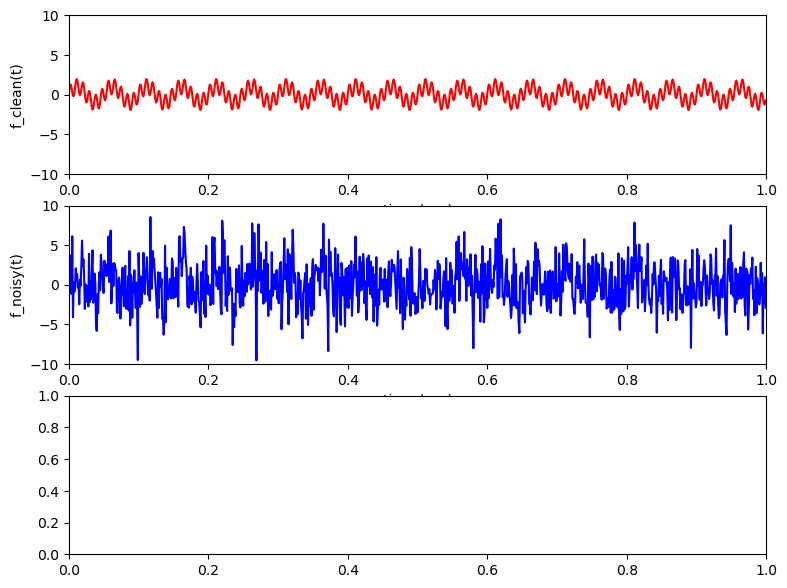

d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


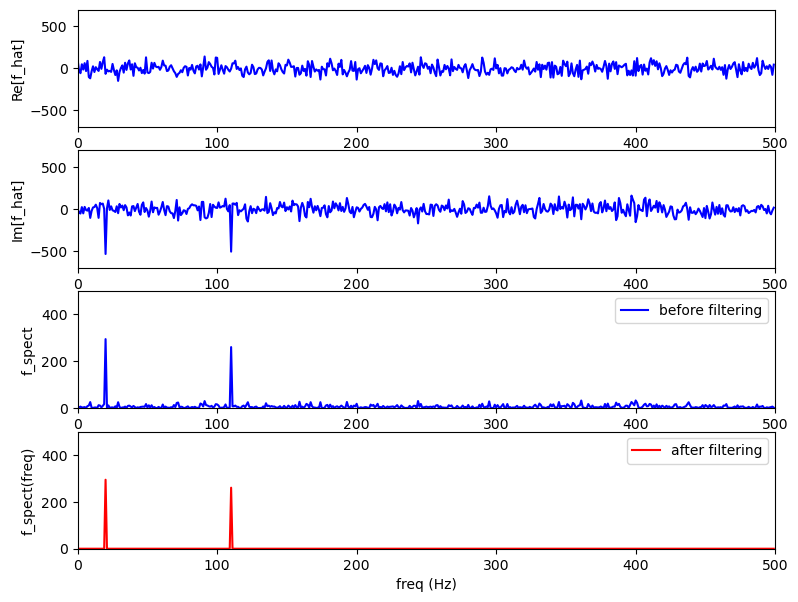

<Figure size 640x480 with 0 Axes>

In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as scifft
 
#噪音处理可以适用
 
plt.close('all')
 
fig1, ax1 = plt.subplots(3, 1, figsize=(9, 7))
 
# 每间隔0.001取一个对象
dt = 0.001
 
#制作时间序列
t = np.arange(0.0, 1.0, dt )
 
#随便定义两个周波数(单位是Hz=1/s)
f1 = 20.0
f2 = 110.0
 
#用上面两个周波数制作信号f(t)
#这个信号是两个周波数合成的信号
f = np.sin(2.0 * np.pi *f1 * t) +np.sin(2.0 * np.pi *f2 * t)
 
#纯净的信号定义成f_clean，代入到f中
f_clean = f
 
ax1[0].plot(t, f_clean, color='red') #f_clean(t)为纵坐标作图
ax1[0].set_xlim(0, 1)
ax1[0].set_ylim(-10, 10)
ax1[0].set_xlabel('time (sec)') 
ax1[0].set_ylabel('f_clean(t)') 
 
#设置乱数加入到f中（制作噪音）
f = f + 2.5 *np.random.randn(len(t))
ax1[1].set_xlim(0, 1)
ax1[1].plot(t, f, color='blue')
ax1[1].set_ylim(-10, 10) 
ax1[1].set_xlabel('time (sec)')
ax1[1].set_ylabel('f_noisy(t)')
plt.show()
 
fig2, ax2 = plt.subplots(4, 1, figsize=(9, 7))
 
#时间的数目代入到num_data
num_data =len(t)
 
#freq把num_data作为横轴。shift是从小到大排序。（逆傅里叶变换的时候也要进行一次shift排序。）
freq = scifft.fftfreq(num_data, d=dt)  
#print("freq(before shit)=",freq)
freq = scifft.fftshift(freq)
#print("freq(after shit)=",freq)
 
 
 
 
"""
下面是信号f(t)的傅里叶变换f_hat(f)。f_hat是周波数f的函数。要注意：f_fat求的结果是複素数（实部+虚部）。
"""
f_hat = scifft.fft(f,n=num_data)
f_hat = scifft.fftshift(f_hat) 
 
"""
傅里叶与f_hat绝对值平方相关的spect(複素数f_hat的絶対値的2乗 除以分割的数目). np.conj是複素共役。f_hat *np.conj(f_hat)是f_hat的绝对值
"""
f_spect = f_hat * np.conj(f_hat)/num_data
#傅里叶纵坐标分为三个：实部，虚部和复数的二乘相关的函数
# f_hat(f)作图（实部real）
ax2[0].plot(freq, np.real(f_hat), color='blue')
ax2[0].set_xlim(0, 500)
ax2[0].set_ylim(-700, 700) 
ax2[0].set_xlabel('freq (Hz)') 
ax2[0].set_ylabel('Re[f_hat]') 
 
# f_hat(f)作图（虚部imag）
ax2[1].plot(freq, np.imag(f_hat), color='blue')
ax2[1].set_xlim(0, 500) 
ax2[1].set_ylim(-700, 700) 
ax2[1].set_xlabel('freq (Hz)') 
ax2[1].set_ylabel('Im[f_hat]')
 
# f_hat的spect作图
ax2[2].plot(freq,f_spect, color='blue',label="before filtering") #傅里叶变换：可以看出有噪音
ax2[2].set_xlim(0, 500) 
ax2[2].set_ylim(0, 500) 
ax2[2].set_xlabel('freq (Hz)') 
ax2[2].set_ylabel('f_spect') 
ax2[2].legend()
 
"""
傅里叶f左右对称，虽然会出现负周期但是可以只输出正的部分。
"""
 
#傅里叶去除噪音部分
#配列indices是超过60的True留下。小于60的全部当做Flase噪音去除。
indices = f_spect>60 #大于60的部分留下
#print("indices=", indices)
 
#f_hat或者f_spect乘以indices（※True（1倍），False(0倍)）可以只使True的留下。其它部分都变成0。
f_spect_filtered = f_spect * indices
f_hat_filtered = f_hat * indices
 
ax2[3].plot(freq,f_spect_filtered, color='red',label="after filtering")
ax2[3].set_xlim(0, 500)
ax2[3].set_ylim(0, 500) 
ax2[3].set_xlabel('freq (Hz)') 
ax2[3].set_ylabel('f_spect(freq)') 
ax2[3].legend()
 
#逆傅里叶变换准备：要用fftshift
f_hat_filtered = scifft.fftshift(f_hat_filtered) #python程序变换的数值都是f_hat的，f_spect是看整体大图应该去除哪部分的。
f_filterd = scifft.ifft(f_hat_filtered,n=num_data)#ifft是逆傅里叶变换
 
ax1[2].set_xlim(0, 1) 
ax1[2].set_ylim(-10, 10) 
ax1[2].plot(t, np.real(f_filterd), color='blue') #只画出实数部
ax1[2].set_xlabel('time (sec)') 
ax1[2].set_ylabel('f_filtered(t)') 
 
plt.show()
plt.tight_layout()

傅里叶变换示例

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams.update({'font.size':18})

#Create a simple signal with two frequencies
data_step   = 0.001
t           = np.arange(start=0,stop=1,step=data_step)
f_clean     = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_noise     = f_clean + 2.5*np.random.randn(len(t))
plt.plot(t,f_noise,color='c',label='Noisy')
plt.plot(t,f_clean,color='k',label='Clean')
plt.legend()

# 从时域到频域的转换
from scipy.fft import rfft,rfftfreq
n    = len(t)
yf   = rfft(f_noise)
xf   = rfftfreq(n,data_step)
plt.plot(xf,np.abs(yf))

# 去除噪声频率
yf_abs      = np.abs(yf) # 计算绝对值
indices     = yf_abs>300   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))

# 将频域数据转换回时域数据
from scipy.fft import irfft
new_f_clean = irfft(yf_clean)
plt.plot(t,new_f_clean)
plt.ylim(-6,8)

实践

In [47]:
import scipy.fft as scifft
import pandas as pd
from scipy.signal import detrend
#傅里叶变换只能接受np.array
google_stock= pd.read_csv("data/Google_Stock_Price_Train.csv")
time = google_stock["Date"][:300]
value = np.array(google_stock["Open"][:300])

denoised_google_stock_price = scifft.fft(value)
yf_abs = np.abs(denoised_google_stock_price)
indices     = yf_abs>300
yf_clean    = indices * denoised_google_stock_price
new_f_clean = scifft.ifft(yf_clean)
# detrend=detrend(new_f_clean, type='linear')

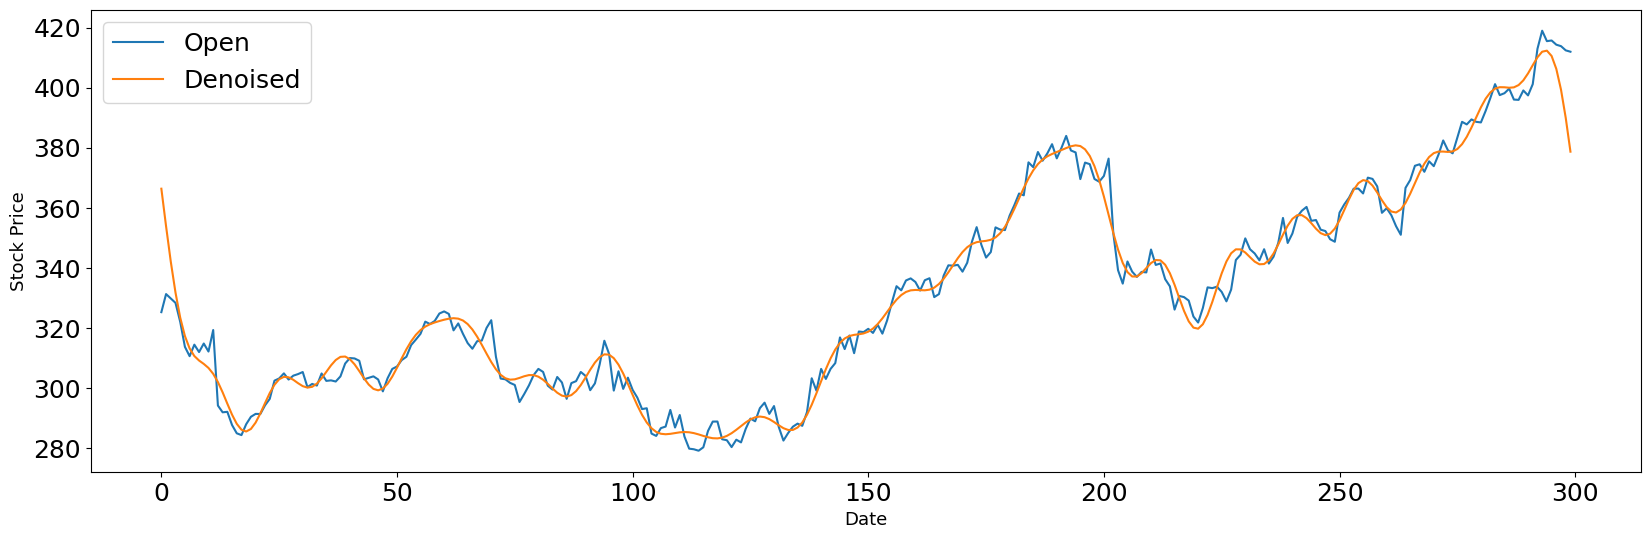

In [49]:
plt.figure(figsize=(20,6))
plt.plot(google_stock['Open'][:300])
plt.plot(new_f_clean)
# plt.plot(detrend)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.legend(['Open','Denoised',])
# plt.legend(['Open','Denoised: 0.001',"detrend"])
plt.show()


In [149]:
google_stock= pd.read_csv("data/Google_Stock_Price_Train.csv",skiprows=1)

In [1]:
import torch
from torch.utils.data import Dataset
 
class CustomDataset(Dataset):
    def __init__(self):
        # 初始化数据集的过程，例如加载数据集文件、预处理数据等
        # 假设我们有一个包含数据样本和标签的列表
        self.data = [1, 2, 3, 4, 5]  # 数据样本
        self.labels = [1, 0, 1, 0, 1]  # 对应的标签
 
    def __len__(self):
        # 返回数据集的大小
        return len(self.data)
 
    def __getitem__(self, idx):
        # 根据索引获取一个数据样本和其标签
        return self.data[idx], self.labels[idx]
 
# 使用CustomDataset
dataset = CustomDataset()
print(len(dataset))  # 输出数据集的大小
sample = dataset[0]  # 获取第一个样本和标签
print(sample)  # 输出第一个样本和标签

5
(1, 1)


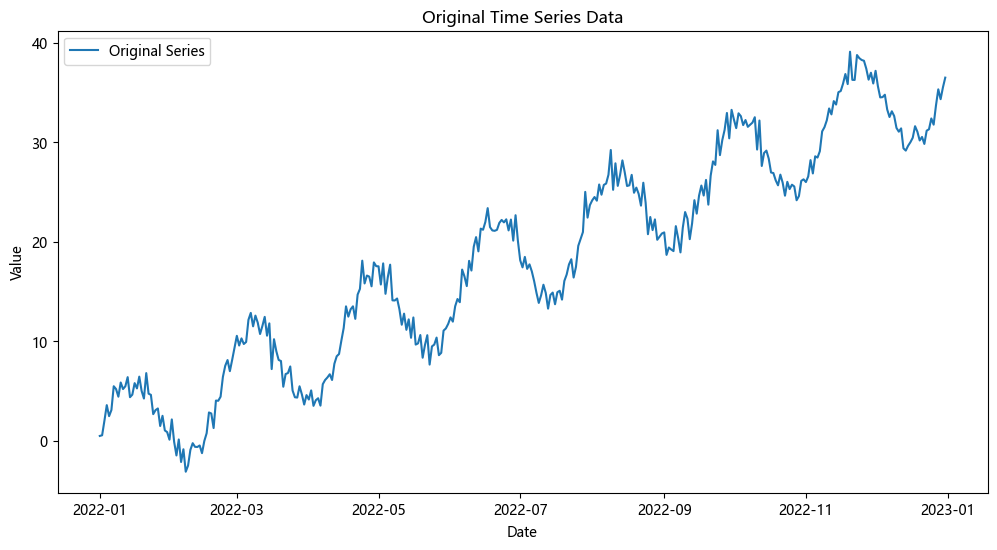

In [67]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import STL

# 创建示例时间序列数据
np.random.seed(42)

# 生成日期范围
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')

# 生成随机的趋势成分
trend_component = 0.1 * np.arange(len(date_rng))

# 生成季节性成分
seasonal_component = 5 * np.sin(2 * np.pi * np.arange(len(date_rng)) / 365 * 7)

# 生成随机噪声
noise = np.random.normal(0, 1, len(date_rng))

# 创建原始时间序列数据
original_series = trend_component + seasonal_component + noise

# 绘制原始时间序列图
plt.figure(figsize=(12, 6))
plt.plot(date_rng, original_series, label='Original Series')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 创建示例时间序列数据
# ...

# 方法1：减去最优拟合线
X = np.arange(len(original_series)).reshape(-1, 1)
model = LinearRegression().fit(X, original_series)
trend_component = model.predict(X)
detrended_series_1 = original_series - trend_component


In [69]:
from statsmodels.tsa.seasonal import STL


# 方法2：从时间序列分解中减去趋势成分
stl_result = STL(original_series, seasonal=13,period=2).fit()
detrended_series_2 = stl_result.resid


In [70]:
# 方法3：减去均值
detrended_series_3 = original_series - original_series.mean()


In [71]:
from  statsmodels.tsa.filters.bk_filter import bkfilter

# 创建示例时间序列数据
# ...

# 方法4：Baxter-King过滤器
detrended_series_4 = bkfilter(original_series, low=6, high=32, K=12)
from  statsmodels.tsa.filters.hp_filter import hpfilter

cycle,detrended_series_4 = hpfilter(original_series)

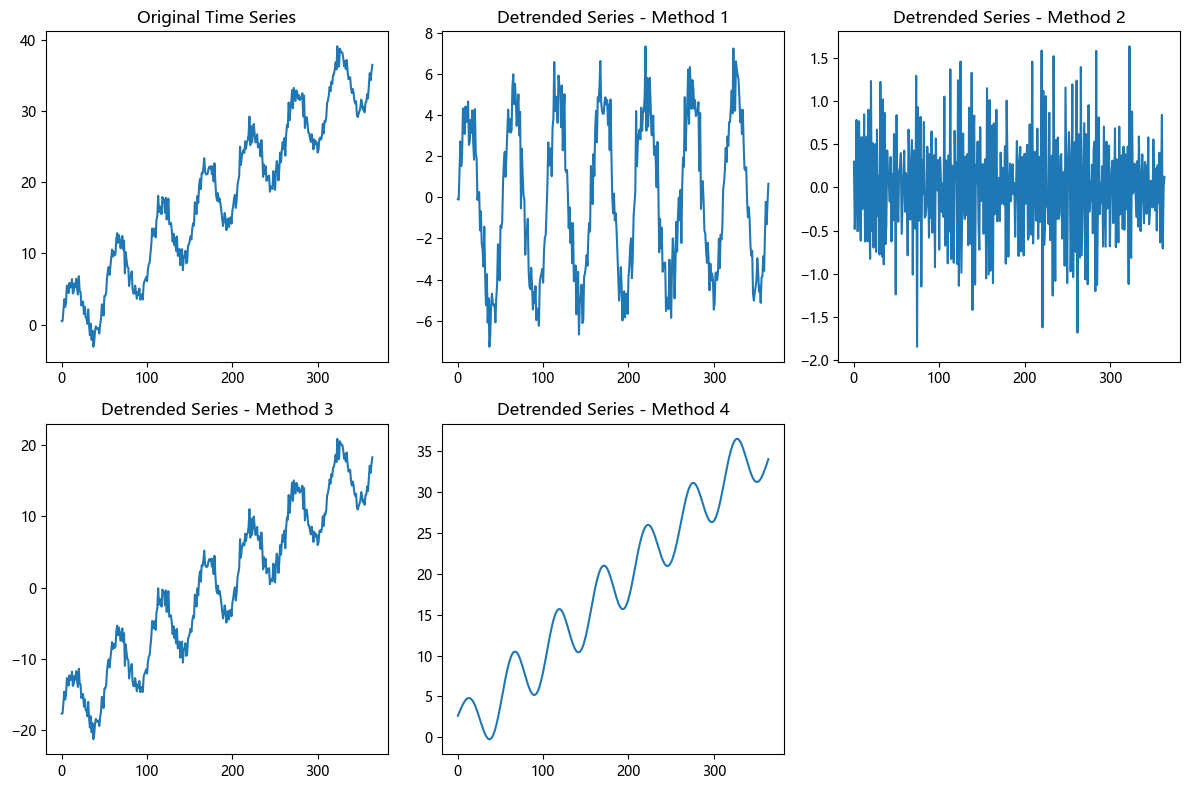

In [72]:
# 可视化去趋势化结果
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(original_series, label='Original Series')
plt.title('Original Time Series')

plt.subplot(2, 3, 2)
plt.plot(detrended_series_1, label='Detrended Series (Method 1)')
plt.title('Detrended Series - Method 1')

plt.subplot(2, 3, 3)
plt.plot(detrended_series_2, label='Detrended Series (Method 2)')
plt.title('Detrended Series - Method 2')

plt.subplot(2, 3, 4)
plt.plot(detrended_series_3, label='Detrended Series (Method 3)')
plt.title('Detrended Series - Method 3')

plt.subplot(2, 3, 5)
plt.plot(detrended_series_4, label='Detrended Series (Method 4)')
plt.title('Detrended Series - Method 4')

plt.tight_layout()
plt.show()


本文介绍了时序分析中常用的四种去趋势化方法，包括减去最优拟合线、时间序列分解、减去均值以及Baxter-King和Hodrick-Prescott过滤器。
减去最优拟合线： 这种方法通过线性回归或多项式回归模型找到数据的最佳拟合线，并从原始时间序列中减去该线。优点是简单易用，适用于线性趋势。缺点是对于非线性趋势的拟合效果较差。

时间序列分解： 使用STL等方法将时间序列分解为趋势、季节和残差三个部分。这样可以更灵活地处理不同类型的趋势和季节性。然而，分解过程可能对噪声敏感。

减去均值： 简单地减去时间序列的均值，使得数据更平稳。这是一种简单直观的方法，适用于一些简单的场景，但无法处理复杂的趋势。

Baxter-King和Hodrick-Prescott过滤器： 这两种过滤器可用于去除时间序列中的移动平均趋势线或循环成分。它们在一定程度上平滑数据，但需要调整参数以适应不同的数据特性。

在选择去趋势化方法时，需要根据数据的实际情况和趋势类型进行选择。对于线性趋势，减去最优拟合线可能是一个不错的选择；对于复杂趋势和季节性，时间序列分解方法更具优势；而简单的场景下，减去均值可能足够。最终的选择取决于数据的特点和分析的目的。


In [1]:
import pandas as pd
import seaborn as sns
original_train = pd.read_csv("data/train.csv")

In [26]:
original_train['date'] = pd.to_datetime(original_train['date'])
original_train['year'] = original_train['date'].dt.year
original_train['month'] = original_train['date'].dt.month
 
# monthly_sales = original_train.groupby(['family', 'year','month']).agg({"sales" : "sum"}).reset_index()
# seafood=monthly_sales[monthly_sales["family"]=="SEAFOOD"]
seafood = original_train[original_train["family"]=="SEAFOOD"]

In [29]:
seafood=seafood[seafood.store_nbr==1]

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

original_series=seafood.sales

# 方法1：减去最优拟合线
X = np.arange(len(seafood.sales)).reshape(-1, 1)
model = LinearRegression().fit(X, seafood.sales)
trend_component = model.predict(X)
detrended_series_1 = seafood.sales - trend_component

from statsmodels.tsa.seasonal import STL


# 方法2：从时间序列分解中减去趋势成分
stl_result = STL(original_series, seasonal=13,period=2).fit()
detrended_series_2 = stl_result.resid

#3
detrended_series_3 = original_series - original_series.mean()

#4
from  statsmodels.tsa.filters.bk_filter import bkfilter
detrended_series_4 = bkfilter(original_series, low=6, high=32, K=12)

#5
from  statsmodels.tsa.filters.hp_filter import hpfilter
cycle,detrended_series_5 = hpfilter(original_series,2)

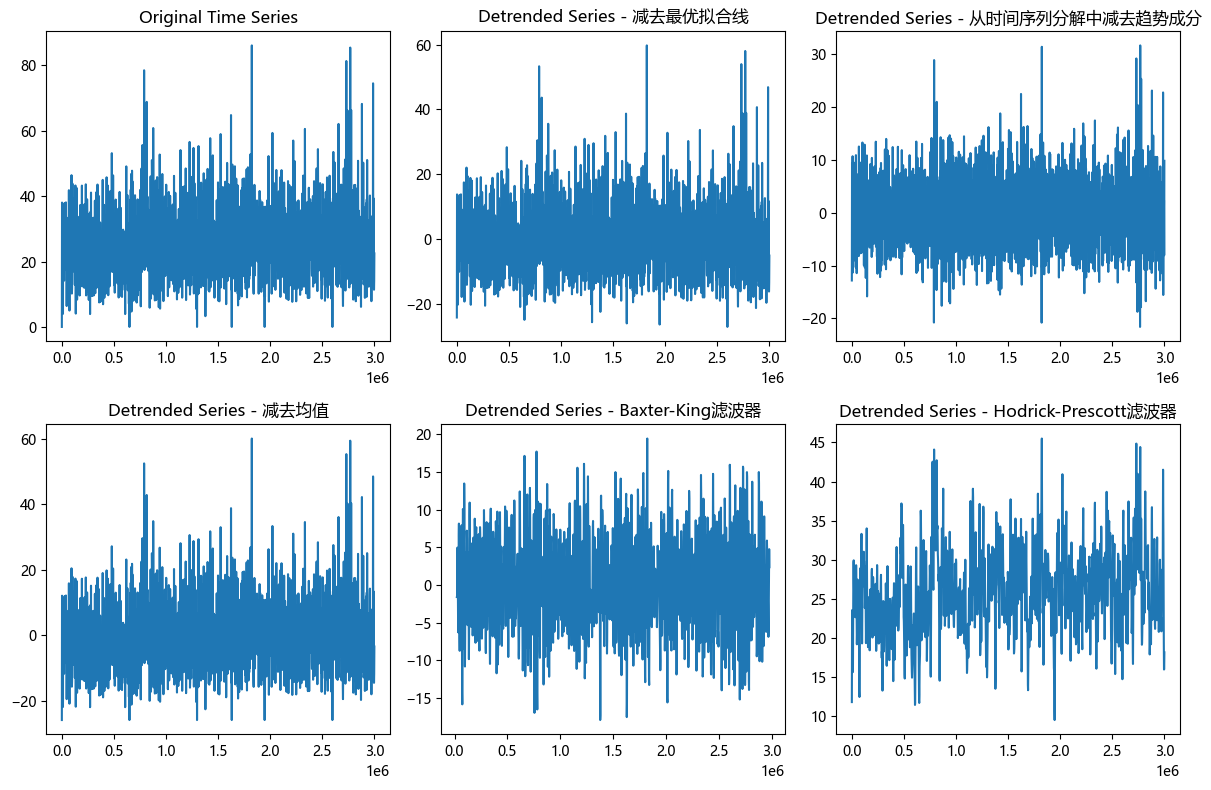

In [31]:
# 可视化去趋势化结果
plt.figure(figsize=(12, 8))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 

plt.subplot(2, 3, 1)
plt.plot(original_series, label='Original Series')
plt.title('Original Time Series')

plt.subplot(2, 3, 2)
plt.plot(detrended_series_1, label='Detrended Series (Method 1)')
plt.title('Detrended Series - 减去最优拟合线')

plt.subplot(2, 3, 3)
plt.plot(detrended_series_2, label='Detrended Series (Method 2)')
plt.title('Detrended Series - 从时间序列分解中减去趋势成分')

plt.subplot(2, 3, 4)
plt.plot(detrended_series_3, label='Detrended Series (Method 3)')
plt.title('Detrended Series - 减去均值')

plt.subplot(2, 3, 5)
plt.plot(detrended_series_4, label='Detrended Series (Method 4)')
plt.title('Detrended Series - Baxter-King滤波器')

plt.subplot(2, 3, 6)
plt.plot(detrended_series_5, label='Detrended Series (Method 4)')
plt.title('Detrended Series - Hodrick-Prescott滤波器')

plt.tight_layout()
plt.show()


d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\anaconda\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


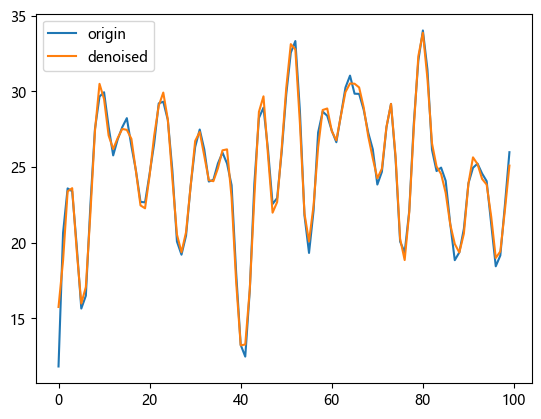

In [46]:
import scipy.fft as scifft
import pandas as pd
from scipy.signal import detrend
#傅里叶变换只能接受np.array
original_series=np.array(detrended_series_5)
value = original_series

denoised = scifft.fft(value)
yf_abs = np.abs(denoised)
indices     = yf_abs>56
yf_clean    = indices * denoised
new_f_clean = scifft.ifft(yf_clean)

# plt.figure(figsize=(20,6))
plt.plot(original_series[:100])
plt.plot(new_f_clean[:100])
# plt.plot(detrend)
plt.legend(['origin','denoised'])
# plt.legend(['Open','Denoised: 0.001',"detrend"])
plt.show()

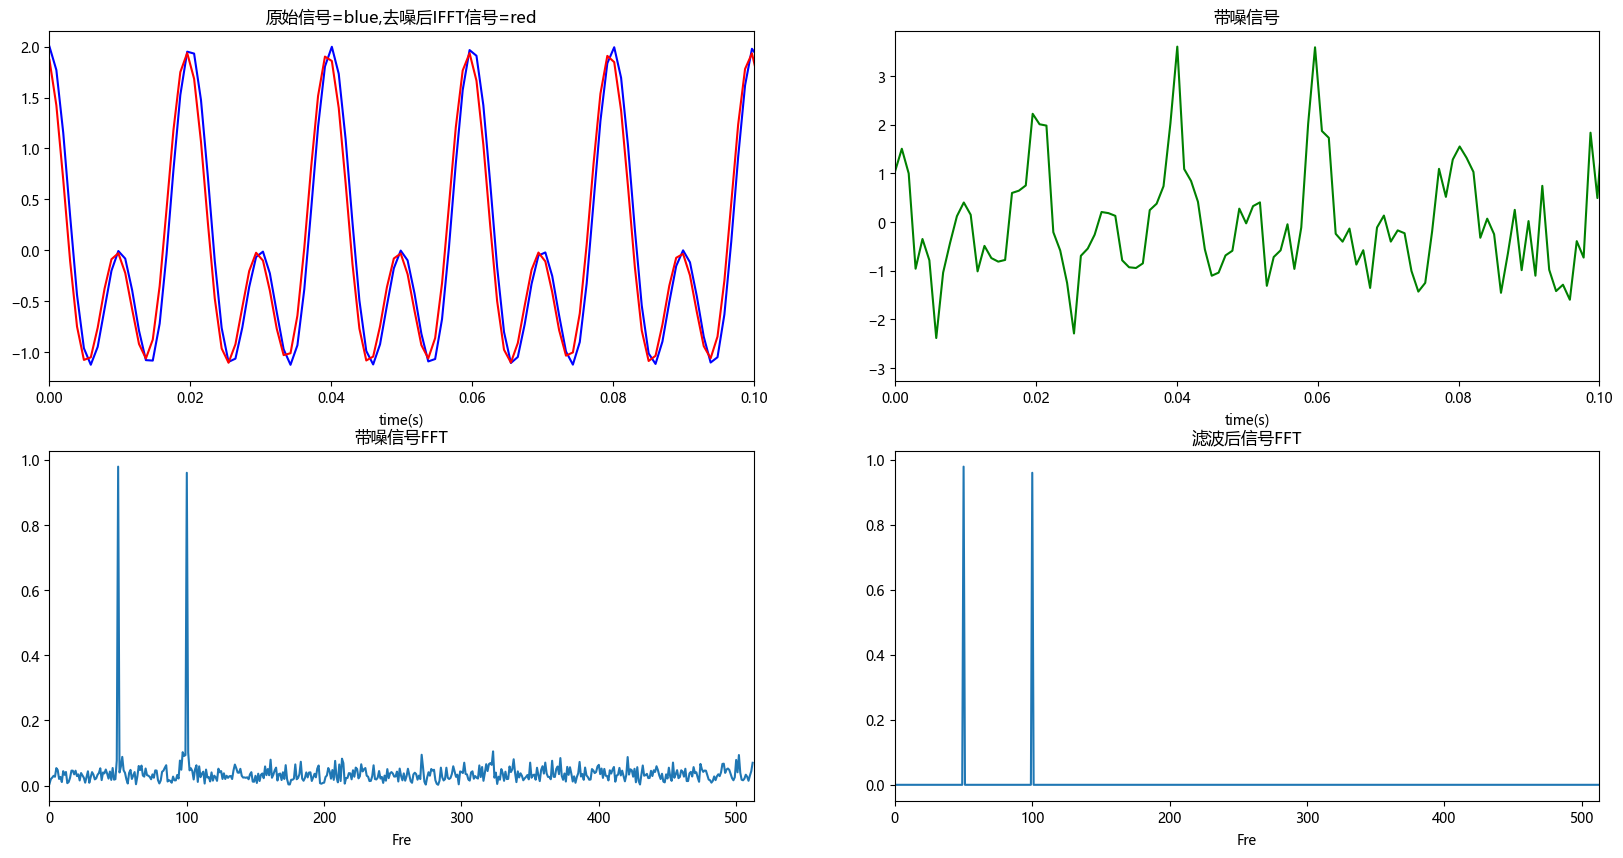

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
sample_rate = 1024
t = np.linspace(0, 1, sample_rate)
fre1 = 50
fre2 = 100
sig = np.cos(2*np.pi*fre1*t) + np.cos(2*np.pi*fre2*t)       # 原始信号
sig_noise = sig + np.random.normal(0, 0.6, len(sig))        # 带噪信号
#   绘制原始信号
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(t, sig, color='blue')
plt.xlim(0, 0.1)
plt.xlabel("time(s)")
plt.title("原始信号=blue,去噪后IFFT信号=red")
#   绘制带噪信号
plt.subplot(2, 2, 2)
plt.plot(t, sig_noise, color='green')
plt.xlim(0, 0.1)
plt.xlabel("time(s)")
plt.title("带噪信号")
#   计算并绘制带噪信号的FFT频域图
n_fft = 1024
fre = np.linspace(0, sample_rate/2, int(n_fft/2)+1)
sig_noise_fft = np.fft.rfft(sig_noise, n_fft)
sig_noise_fft_abs = np.abs(sig_noise_fft)*2/n_fft
plt.subplot(2, 2, 3)
plt.plot(fre, sig_noise_fft_abs)
plt.xlim(0, 513)
plt.xlabel("Fre")
plt.title("带噪信号FFT")
#   对带噪信号滤波并绘制FFT频域图
found_fre = np.where(sig_noise_fft_abs < 0.3)       # 滤波：判定数组内abs<0.3的值为噪声，并抽取其数组索引
filter_sig_noise_fft = sig_noise_fft.copy()
filter_sig_noise_fft[found_fre] = 0                 # 滤波：将抽取的数组索引对应的FFT值赋0，去噪
filter_sig_noise_fft_abs = sig_noise_fft_abs.copy()
filter_sig_noise_fft_abs[found_fre] = 0
plt.subplot(2, 2, 4)
plt.plot(fre, filter_sig_noise_fft_abs)
plt.xlim(0, 513)
plt.xlabel("Fre")
plt.title("滤波后信号FFT")
#   对滤波后的带噪信号进行IFFT并绘制时域图与原信号对比
filter_sig_noise_ifft = np.fft.irfft(filter_sig_noise_fft, 1024)
plt.subplot(2, 2, 1)
plt.plot(t, filter_sig_noise_ifft, color='red')
plt.xlim(0, 0.1)
plt.show()